## Test données sattelites & Séries temporelles 

On sort les images de l'API de la NASA

In [ ]:
#Packages
! pip install requests
! pip install json
! pip install matplotib.pyplot
! pip install time
! pip install numpy 
! pip install yfinance
! pip install pandas


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement json (from versions: none)

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip
ERROR: No matching distribution found for json
ERROR: Could not find a version that satisfies the requirement matplotib.pyplot (from versions: none)

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip
ERROR: No matching distribution found for matplotib.pyplot
ERROR: Could not find a version that satisfies the requirement time (from versions: none)

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip
ERROR: No matching distribution found for time

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: py

In [33]:
#Packages
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io
import yfinance as yf 
import pandas as pd
import os
import time

CODE 200
TYPE image/png


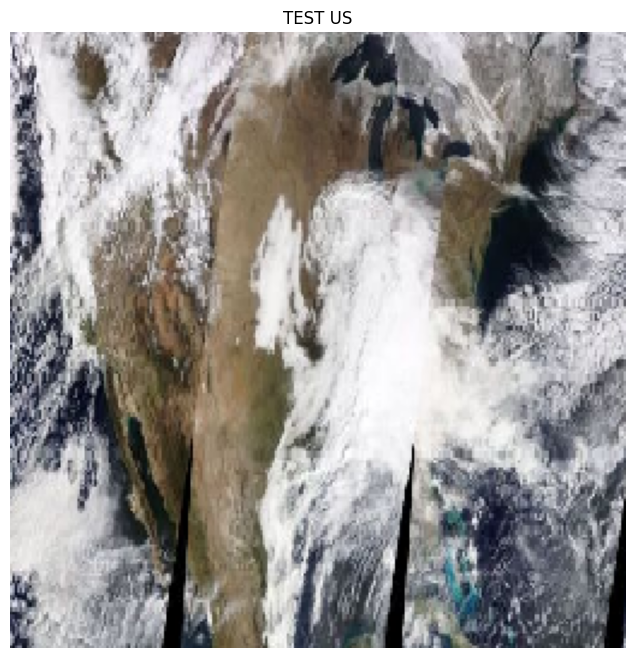

In [ ]:
#get satelite data test

params = {
    "SERVICE": "WMS",
    "REQUEST": "GetMap",
    "VERSION": "1.3.0",
    "LAYERS":  "MODIS_Terra_CorrectedReflectance_TrueColor", #Basic image de la terre
    "CRS": "EPSG:4326",
    "BBOX": "21,-128,49,-59",
    "WIDTH": 256, # On baisse la résolution 
    "HEIGHT": 256,
    "FORMAT": "image/png",
    "TIME": "2024-03-01", 
    "TRANSPARENT": "FALSE"
}

API_endpoint = "https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi"

response = requests.get(API_endpoint, params=params, timeout=30)

print(f"CODE {response.status_code}")
print(f"TYPE {response.headers.get('Content-Type')}")

if response.status_code == 200: #success
    if response.content.startswith(b'\x89PNG'):
        img = mpimg.imread(io.BytesIO(response.content))
        plt.figure(figsize=(12, 8))
        plt.imshow(img)
        plt.title("TEST US")
        plt.axis('off')
        plt.show()
    else:
        print("PAS PNG")
        print(response.text[:200])
else:
    print(f"Error: {response.status_code}")
    print(response.text[:500]) #Erreur

In [ ]:
# Time series tirée de YF

Tickers = ["ZC=F", "ZM=F", "GF=F", "LE=F"] #Corn / Soybean / Feeder cattle / live cattle
data_price = []
for ticker in Tickers:
    data = yf.download(ticker,"2025-02-01", progress = False, auto_adjust=False, interval="1mo") #1year of data
    data_price.append(data['Adj Close'].pct_change().dropna())
data_price

df_data_close = pd.concat(data_price, axis=1)
df_data_close.columns = ["Corn","Soy","Cow_food","Cows"] 

df_data_close.head()


,Corn,Soy,Cow_food,Cows
Date,,,,
2025-03-01,0.008269,0.003428,0.041731,0.050955
2025-04-01,0.021870,-0.009225,0.021382,0.038258
2025-05-01,-0.049759,0.021724,0.021362,-0.001275
2025-07-01,-0.112613,-0.116436,0.108927,0.057083
2025-08-01,0.010152,0.083270,0.100792,0.062013


In [ ]:
# Image par data dans le dataset (TEST)
dates =  df_data_close.index.strftime('%Y-%m-%d').tolist() #On change le format

params = {
"SERVICE": "WMS",
"REQUEST": "GetMap",
"VERSION": "1.3.0",
"LAYERS":  "MODIS_Terra_CorrectedReflectance_TrueColor", #Basic image
"CRS": "EPSG:4326",
"BBOX": "21,-128,49,-59",
"WIDTH": 256, # On baisse la résolution 
"HEIGHT": 256,
"FORMAT": "image/png",
"TIME": "01-01-2020", 
"TRANSPARENT": "FALSE"""
}

images_dict={}
for i, date in enumerate(dates):
    if i > 0:
        time.sleep(2)  #On est gentil avec l'API de la Nasa
    params['TIME'] = date 
    print(f"{params['TIME']}") 
    try:
        API_endpoint = "https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi"
        response = requests.get(API_endpoint, params=params, timeout=30)
        
        if response.status_code == 200:  # Success
            if response.content.startswith(b'\x89PNG'):  
                img = mpimg.imread(io.BytesIO(response.content))
                images_dict[date] = img
            else:
                print(f"Response not PNG for {date}") 
                print(response.text[:200]) 
                
        else:
            print(f"Error {response.status_code} for {date}")  
 
    except Exception as e:  
        print(f"Erreur pour {date}: {str(e)}")  


2025-03-01


2025-04-01
2025-05-01
2025-07-01
2025-08-01
2025-09-01
2025-10-01
2025-11-01
2025-12-01
2026-01-01


['2025-03-01', '2025-04-01', '2025-05-01']


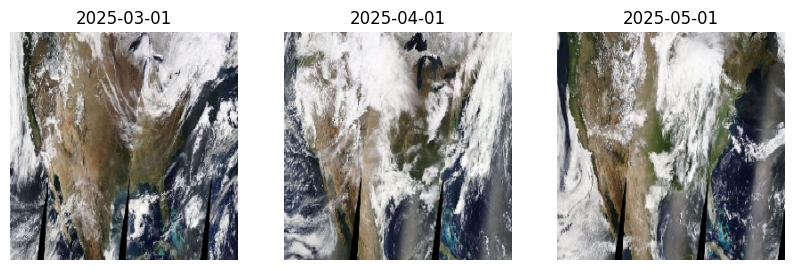

In [ ]:
# Check visu

fig, axes = plt.subplots(1, 3, figsize=(10, 6))
test_dates = list(images_dict.keys())[:3]
print(test_dates)
for idx, date in enumerate(test_dates):
        img = images_dict[date]
        axes[idx].imshow(img)
        axes[idx].set_title(f"{date}")
        axes[idx].axis('off')
plt.show()
